# Does gelatine make PVA degrade faster?

In [3]:
#Import libraries
!pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

     |████████████████████████████████| 242 kB 4.6 MB/s eta 0:00:01


In [4]:
#Create a dataframe from the data set

df = pd.read_excel('Dataset_3.xlsx')
df.head(25)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,* Does gelatin make PVA degrade faster?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,PVA- gelatin,NaN,NaN,NaN,NaN,PVA,NaN,NaN
5,%,Repeat 1,Repeat 2,Repeat 3,NaN,%,Repeat 1,Repeat 2,Repeat 3
6,Day 1,10.769413,4.855374,4.871488,NaN,Day 1,25.371281,14.794058,19.042696
7,NaN,8.797466,5.982802,7.073099,NaN,NaN,28.945981,17.992369,22.529734
8,NaN,8.947023,5.548924,6.63525,NaN,NaN,26.092739,15.469808,20.39367
9,Day 3,6.930871,6.539349,4.044672,NaN,Day 3,20.954005,14.913161,20.436355


In [5]:
#Rearranging the dataframe

df = df.drop([0, 1, 2, 3, 4, 5])
df = df.drop(df.columns[4], axis=1)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545


In [6]:
df = df.rename({'Unnamed: 0': 'Day', 'Unnamed: 1': 'Repeat 1.G', 'Unnamed: 2': 'Repeat 2.G', 'Unnamed: 3': 'Repeat 3.G', 'Unnamed: 5': 'Day', 'Unnamed: 6': 'Repeat 1', 'Unnamed: 7': 'Repeat 2', 'Unnamed: 8': 'Repeat 3'}, axis=1)
df.head()

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545


In [7]:
#Adding new column for the average of each sample across three repeats in the PVA with gelatine group

df['avg_g'] = df[['Repeat 1.G', 'Repeat 2.G', 'Repeat 3.G']].mean(axis=1)
df.head()

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3,avg_g
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696,6.832092
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734,7.284456
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367,7.043733
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355,5.838298
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545,6.634122


Adding new columns to the dataframe that will allow me to plot and analyse the data:

In [8]:
#Adding new column for the average of each sample across three repeats in the PVA without gelatine group

df['avg'] = df[['Repeat 1', 'Repeat 2', 'Repeat 3']].mean(axis=1)
df.head()

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3,avg_g,avg
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696,6.832092,19.736012
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734,7.284456,23.156028
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367,7.043733,20.652072
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355,5.838298,18.767840
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545,6.634122,20.920396


In [9]:
#Creating a column with the difference between the average of each group

df['diff'] = df['avg'] - df['avg_g']
df.head()

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3,avg_g,avg,diff
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696,6.832092,19.736012,12.903920
7,NaN,8.797466,5.982802,7.073099,NaN,28.945981,17.992369,22.529734,7.284456,23.156028,15.871572
8,NaN,8.947023,5.548924,6.63525,NaN,26.092739,15.469808,20.39367,7.043733,20.652072,13.608340
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355,5.838298,18.767840,12.929543
10,NaN,7.19341,7.785491,4.923465,NaN,21.697067,18.799576,22.264545,6.634122,20.920396,14.286274


In [10]:
#Remove NaN values

df.fillna('')

,Day,Repeat 1.G,Repeat 2.G,Repeat 3.G,Day,Repeat 1,Repeat 2,Repeat 3,avg_g,avg,diff
6,Day 1,10.769413,4.855374,4.871488,Day 1,25.371281,14.794058,19.042696,6.832092,19.736012,12.903920
7,,8.797466,5.982802,7.073099,,28.945981,17.992369,22.529734,7.284456,23.156028,15.871572
8,,8.947023,5.548924,6.635250,,26.092739,15.469808,20.393670,7.043733,20.652072,13.608340
9,Day 3,6.930871,6.539349,4.044672,Day 3,20.954005,14.913161,20.436355,5.838298,18.767840,12.929543
10,,7.193410,7.785491,4.923465,,21.697067,18.799576,22.264545,6.634122,20.920396,14.286274
11,,10.196613,4.126606,7.699192,,25.040578,18.321610,23.383041,7.340804,22.248410,14.907606
12,Day 7,9.344181,4.920430,8.406278,Day 7,27.065203,25.247595,25.317270,7.556963,25.876689,18.319726
13,,8.089227,7.312273,8.374282,,24.527381,23.047634,27.299523,7.925261,24.958180,17.032919
14,,6.999106,6.123969,10.388054,,28.739428,17.417131,25.462379,7.837043,23.872979,16.035936
15,Day 10,9.701697,9.961237,10.664634,Day 10,22.535092,19.391415,27.770710,10.109189,23.232406,13.123216


## Data Visualisation

Text(0.5, 1.0, 'PVA Repeat 3')

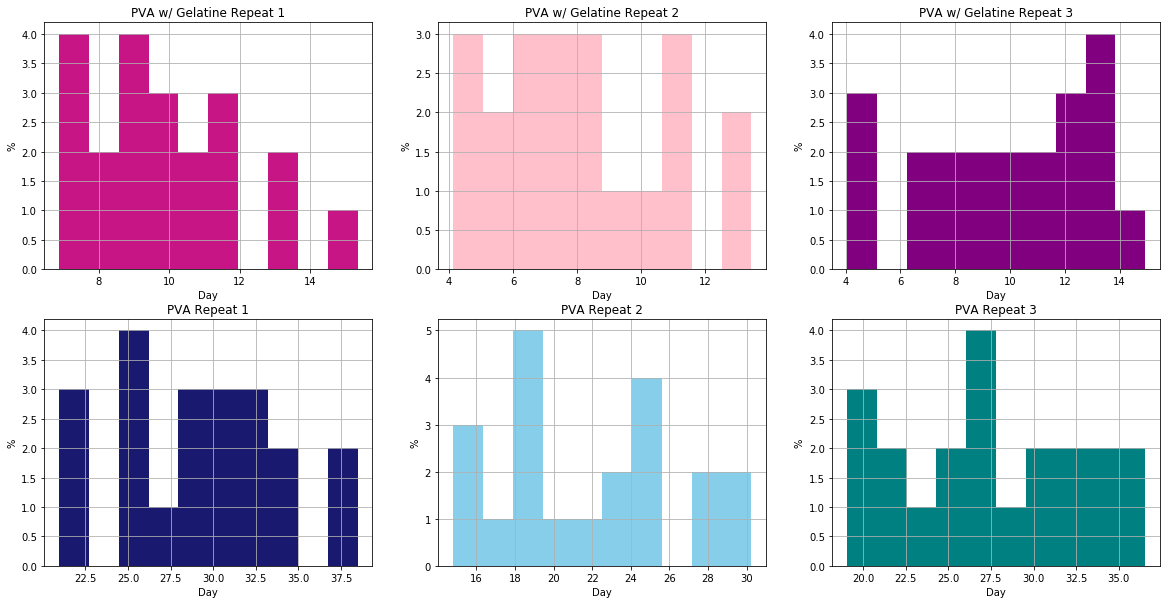

In [11]:
#Create a subplot with histograms for each repeat in each of the data sets

plt.figure (figsize=(20,10))

plt.subplot(231)
df['Repeat 1.G'].hist(bins = 10, color = 'mediumvioletred')
plt.ylabel('%')
plt.xlabel('Day')
plt.title('PVA w/ Gelatine Repeat 1')

plt.subplot(232)
df['Repeat 2.G'].hist(bins = 10, color = 'pink')
plt.ylabel('%')
plt.xlabel('Day')
plt.title('PVA w/ Gelatine Repeat 2')

plt.subplot(233)
df['Repeat 3.G'].hist(bins = 10, color = 'purple')
plt.ylabel('%')
plt.xlabel('Day')
plt.title('PVA w/ Gelatine Repeat 3')

plt.subplot(234)
df['Repeat 1'].hist(bins = 10, color = 'midnightblue')
plt.ylabel('%')
plt.xlabel('Day')
plt.title('PVA Repeat 1')

plt.subplot(235)
df['Repeat 2'].hist(bins = 10, color = 'skyblue')
plt.ylabel('%')
plt.xlabel('Day')
plt.title('PVA Repeat 2')

plt.subplot(236)
df['Repeat 3'].hist(bins = 10, color = 'teal')
plt.ylabel('%')
plt.xlabel('Day')
plt.title('PVA Repeat 3')

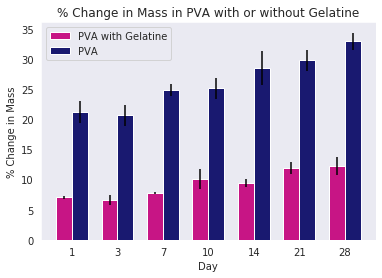

In [21]:
#Create a group barplot with PVA samples with gelatine grouped with PVA samples without gelatine at each day


#Take the average and std of all samples on each day
labels = ['1', '3', '7', '10', '14', '21', '28']
avg_w_g = [df.loc[6:8, 'avg_g'].mean(), df.loc[9:11, 'avg_g'].mean(), df.loc[12:14, 'avg_g'].mean(),
           df.loc[15:17, 'avg_g'].mean(), df.loc[18:20, 'avg_g'].mean(), df.loc[21:23, 'avg_g'].mean(),
           df.loc[24:26, 'avg_g'].mean()]
avg_wo_g = [df.loc[6:8, 'avg'].mean(), df.loc[9:11, 'avg'].mean(), df.loc[12:14, 'avg'].mean(),
           df.loc[15:17, 'avg'].mean(), df.loc[18:20, 'avg'].mean(), df.loc[21:23, 'avg'].mean(),
           df.loc[24:26, 'avg'].mean()]
error1 = [df.loc[6:8, 'avg_g'].std(), df.loc[9:11, 'avg_g'].std(), df.loc[12:14, 'avg_g'].std(),
           df.loc[15:17, 'avg_g'].std(), df.loc[18:20, 'avg_g'].std(), df.loc[21:23, 'avg_g'].std(),
           df.loc[24:26, 'avg_g'].std()]
error2 = [df.loc[6:8, 'avg'].std(), df.loc[9:11, 'avg'].std(), df.loc[12:14, 'avg'].std(),
           df.loc[15:17, 'avg'].std(), df.loc[18:20, 'avg'].std(), df.loc[21:23, 'avg'].std(),
           df.loc[24:26, 'avg'].std()]

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_w_g, width, color = 'mediumvioletred', ecolor = 'black', yerr = error1, label='PVA with Gelatine')
rects2 = ax.bar(x + width/2, avg_wo_g, width, color = 'midnightblue', ecolor = 'black', yerr = error2, label='PVA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Change in Mass')
ax.set_xlabel('Day')
ax.set_title('% Change in Mass in PVA with or without Gelatine')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Text(0.5, 1.0, 'Degradation of PVA over time')

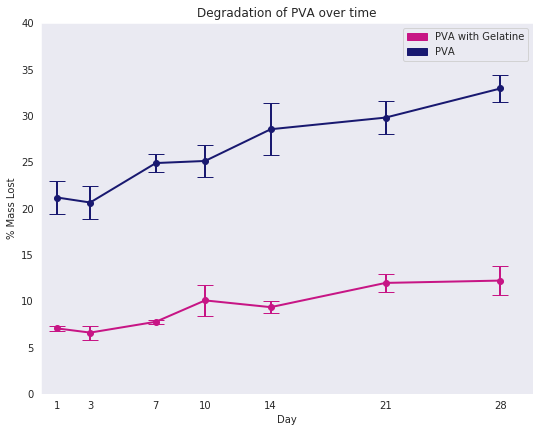

In [27]:
#Create a errorbar figure for the average daily % in both sample groups

import matplotlib.patches as mpatches

plt.figure (figsize=(30,15))

x = [1, 3, 7, 10, 14, 21, 28]


plt.subplot(231)
plt.errorbar(x, avg_w_g, error1, marker = 'o', color = 'mediumvioletred', ecolor = 'mediumvioletred', linewidth = 2.0, capsize = 8.0)
plt.errorbar(x, avg_wo_g, error2, marker = 'o', color = 'midnightblue', ecolor = 'midnightblue', linewidth = 2.0, capsize = 8.0)
plt.ylabel('% Mass Lost')
plt.xlabel('Day')
PVA_G_legend = mpatches.Patch(color='mediumvioletred', label='PVA with Gelatine')
PVA_legend = mpatches.Patch(color='midnightblue', label='PVA')
plt.legend(handles=[PVA_G_legend, PVA_legend])
#PVA_legend = mpatches.Patch(color='midnightblue', label='PVA')
#plt.legend(handles=[PVA_legend])
plt.axis([0, 30, 0, 40])
plt.xticks([1, 3, 7, 10, 14, 21, 28])
plt.title('Degradation of PVA over time')

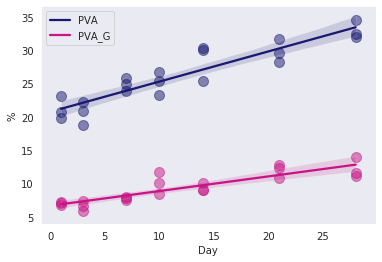

In [14]:
#Scatter plots using the average values of each sample across the three repeats

#Add in a column with all the days to help with the readability of the df
df['days'] = [1, 1, 1,
             3, 3, 3,
             7, 7, 7,
             10, 10, 10,
             14, 14, 14,
             21, 21, 21, 
             28, 28, 28] 

import seaborn as sns

sns.set_style('dark')

ax = sns.regplot(x = df.days, y = df.avg, data = df,
           scatter_kws = {'s': 100, 'alpha': 0.5, 'color': 'midnightblue'},
           line_kws = {'color': 'midnightblue'})
ax1 = sns.regplot(x = df.days, y = df.avg_g, data = df,
           scatter_kws = {'s': 100, 'alpha': 0.5, 'color': 'mediumvioletred'},
           line_kws = {'color': 'mediumvioletred'})

ax.set(xlabel = 'Day', ylabel = '%', label = 'PVA')
ax1.set(xlabel = 'Day', ylabel = '%')
ax.legend(labels = ['PVA', 'PVA_G'])
#plt.xlabels('Day')
#plt.ylabels('%')
#plt.legend(labels=["PVA w/G","PVA"])

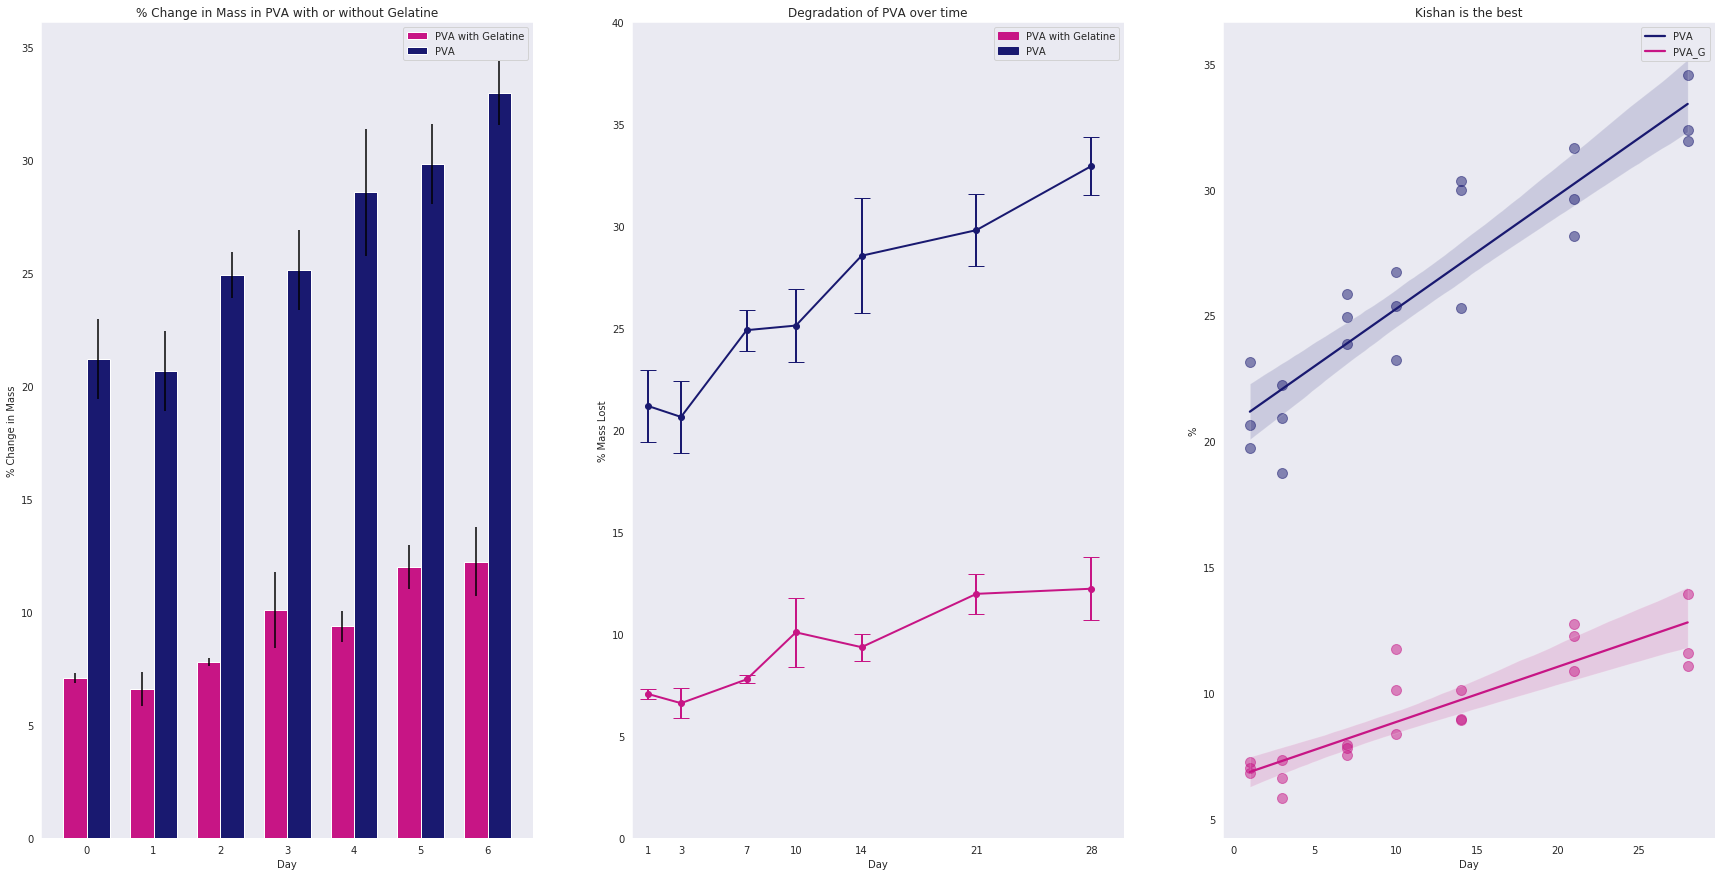

In [57]:
# Set up main plot
main_fig, main_axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

# PLOT 1: % Change in Mass in PVA with or without Gelatine
labels = ['1', '3', '7', '10', '14', '21', '28']
avg_w_g = [df.loc[6:8, 'avg_g'].mean(), df.loc[9:11, 'avg_g'].mean(), df.loc[12:14, 'avg_g'].mean(),
           df.loc[15:17, 'avg_g'].mean(), df.loc[18:20, 'avg_g'].mean(), df.loc[21:23, 'avg_g'].mean(),
           df.loc[24:26, 'avg_g'].mean()]
avg_wo_g = [df.loc[6:8, 'avg'].mean(), df.loc[9:11, 'avg'].mean(), df.loc[12:14, 'avg'].mean(),
           df.loc[15:17, 'avg'].mean(), df.loc[18:20, 'avg'].mean(), df.loc[21:23, 'avg'].mean(),
           df.loc[24:26, 'avg'].mean()]
error1 = [df.loc[6:8, 'avg_g'].std(), df.loc[9:11, 'avg_g'].std(), df.loc[12:14, 'avg_g'].std(),
           df.loc[15:17, 'avg_g'].std(), df.loc[18:20, 'avg_g'].std(), df.loc[21:23, 'avg_g'].std(),
           df.loc[24:26, 'avg_g'].std()]
error2 = [df.loc[6:8, 'avg'].std(), df.loc[9:11, 'avg'].std(), df.loc[12:14, 'avg'].std(),
           df.loc[15:17, 'avg'].std(), df.loc[18:20, 'avg'].std(), df.loc[21:23, 'avg'].std(),
           df.loc[24:26, 'avg'].std()]

x = np.arange(len(labels))  
width = 0.35 

main_axes[0].bar(x - width/2, avg_w_g, width, color = 'mediumvioletred', ecolor = 'black', yerr = error1, label='PVA with Gelatine')
main_axes[0].bar(x + width/2, avg_wo_g, width, color = 'midnightblue', ecolor = 'black', yerr = error2, label='PVA')
main_axes[0].set_title('% Change in Mass in PVA with or without Gelatine')
main_axes[0].set_ylabel('% Change in Mass')
main_axes[0].set_xlabel('Day')
main_axes[0].legend()


# PLOT 2: Degradation of PVA over time
x = [1, 3, 7, 10, 14, 21, 28]

main_axes[1].errorbar(x, avg_w_g, error1, marker = 'o', color = 'mediumvioletred', ecolor = 'mediumvioletred', linewidth = 2.0, capsize = 8.0)
main_axes[1].errorbar(x, avg_wo_g, error2, marker = 'o', color = 'midnightblue', ecolor = 'midnightblue', linewidth = 2.0, capsize = 8.0)
main_axes[1].set_ylabel('% Mass Lost')
main_axes[1].set_xlabel('Day')
PVA_G_legend = mpatches.Patch(color='mediumvioletred', label='PVA with Gelatine')
PVA_legend = mpatches.Patch(color='midnightblue', label='PVA')
main_axes[1].legend(handles=[PVA_G_legend, PVA_legend])
PVA_legend = mpatches.Patch(color='midnightblue', label='PVA')
main_axes[1].axis([0, 30, 0, 40])
main_axes[1].set_xticks([1, 3, 7, 10, 14, 21, 28])
main_axes[1].set_title('Degradation of PVA over time')


# PLOT 3: 
df['days'] = [1, 1, 1,
             3, 3, 3,
             7, 7, 7,
             10, 10, 10,
             14, 14, 14,
             21, 21, 21, 
             28, 28, 28] 
ax = sns.regplot(x = df.days, y = df.avg, data = df,
           scatter_kws = {'s': 100, 'alpha': 0.5, 'color': 'midnightblue'},
           line_kws = {'color': 'midnightblue'})
ax1 = sns.regplot(x = df.days, y = df.avg_g, data = df,
           scatter_kws = {'s': 100, 'alpha': 0.5, 'color': 'mediumvioletred'},
           line_kws = {'color': 'mediumvioletred'})

ax.set(xlabel = 'Day', ylabel = '%', label = 'PVA')
ax1.set(xlabel = 'Day', ylabel = '%')
ax.legend(labels = ['PVA', 'PVA_G'])

main_axes[2].set_title('Kishan is the best')

plt.show()

From the visualisation of this data we can deduce that in both the PVA-Gelatine and PVA groups there is an increasing change in mass over time compared to the original value. In the PVA group, this starts at a higher value, and there is a steeper change over time, suggesting this occurs at a faster rate than in the group where gelatine is present.

## Statistical Analysis

### In order to ensure the conclusions drawn from our data are correct we must run statistical analysis tests

In [27]:
df.describe()

,avg_g,avg,diff,days
count,21.000000,21.000000,21.000000,21.000000
mean,9.292316,26.167442,16.875126,12.000000
std,2.314586,4.560426,2.865594,9.262829
min,5.838298,18.767840,12.903920,1.000000
25%,7.340804,23.156028,14.286274,3.000000
50%,8.946226,25.399968,16.875740,10.000000
75%,11.078155,29.996640,19.371257,21.000000
max,13.960972,34.556703,21.422758,28.000000


<AxesSubplot:>

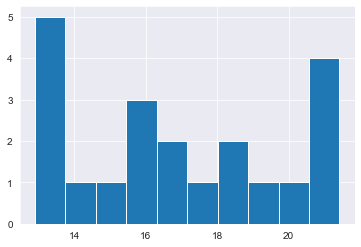

In [21]:
#Histogram to show the spread of data

df['diff'].hist()

Data does not appear to be normal, further analysis required


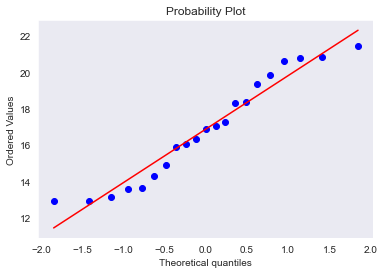

In [22]:
stats.probplot(df['diff'], plot = plt)

print('Data does not appear to be normal, further analysis required')

In [23]:
#Test for normal distribution
stats.shapiro(df['diff'])

ShapiroResult(statistic=0.9306460022926331, pvalue=0.14181870222091675)

In [26]:
statistics, p_value = stats.ttest_ind(df['avg_g'], df['avg'])

if (p_value < 0.05):
    print('pvalue = '+str(p_value)+' < 0.05 --> H0 can be rejected - Data seems to be significantly different!')
else:
    print('H0 can NOT be rejected - a significant difference can not be deduced!')

pvalue = 3.881792713049693e-18 < 0.05 --> H0 can be rejected - Data seems to be significantly different!
